# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw2.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw2.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw2.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw2.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Implement a decision tree from scratch.
4. Prune the tree to achieve better results.
5. Visualize your results and the tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw2 import * # this imports all functions from hw2.

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Warmup - OOP in python

Our decision tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x10e6d5128>, <__main__.Node at 0x10e6d5240>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points) in the python file `hw2.py`. You are encouraged to test your implementation using the cell below.

In [5]:
# test
test = np.array([[1, 1],[1, 1], [1, 1], [1, 1], [0, 0], [0, 0]])
print("test : ")
print(test)
print("expected result of Gini in test is : 16/36 = 0.4444444444444444")
print("calc_gini result is : " + str(calc_gini(test)))

print("expected result of Entropy in test is : 0.91829583405")
print("calc_entropy result is : " + str(calc_entropy(test)))

test : 
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]]
expected result of Gini in test is : 16/36 = 0.4444444444444444
calc_gini result is : 0.4444444444444444
expected result of Entropy in test is : 0.91829583405
calc_entropy result is : 0.9182958340544896


In [6]:
print("calc_gini according to X_train is : " + str(calc_gini(X_train)))
print("calc_entropy according to X_train is : " + str(calc_entropy(X_train)))

calc_gini according to X_train is : 0.47768299940488
calc_entropy according to X_train is : 0.9675594819018212


## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `hw2.py`. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. In this exercise, create at most a single split for each node of the tree. The threshold you need to use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

Complete the class `DecisionNode` in the python file `hw2.py`. The structure of this class is entirely up to you. Complete the function `build_tree` in the python file `hw2.py`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points).

In [7]:
# test on training dataset
# threshold = 0.14235
# feature = 27

feature, best_thres, left_child, right_child = best_feature(X_train, calc_gini)
print("feature index = " + str(feature))
print("best threshold = " + str(best_thres))

print(left_child)
print("-------------------------")
print(right_child)

feature index = 27
best threshold = 0.14235
[[1.200e+01 2.823e+01 7.677e+01 ... 2.447e-01 8.194e-02 1.000e+00]
 [1.157e+01 1.904e+01 7.420e+01 ... 3.035e-01 8.284e-02 1.000e+00]
 [1.316e+01 2.054e+01 8.406e+01 ... 2.687e-01 7.429e-02 1.000e+00]
 ...
 [1.460e+01 2.329e+01 9.397e+01 ... 2.477e-01 6.836e-02 0.000e+00]
 [1.808e+01 2.184e+01 1.174e+02 ... 2.369e-01 6.558e-02 0.000e+00]
 [1.008e+01 1.511e+01 6.376e+01 ... 2.933e-01 7.697e-02 1.000e+00]]
-------------------------
[[1.646e+01 2.011e+01 1.093e+02 ... 3.054e-01 9.519e-02 0.000e+00]
 [1.490e+01 2.253e+01 1.021e+02 ... 2.866e-01 1.155e-01 0.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 0.000e+00]
 ...
 [9.029e+00 1.733e+01 5.879e+01 ... 4.228e-01 1.175e-01 1.000e+00]
 [1.747e+01 2.468e+01 1.161e+02 ... 2.160e-01 9.300e-02 0.000e+00]
 [1.674e+01 2.159e+01 1.101e+02 ... 4.863e-01 8.633e-02 0.000e+00]]


In [8]:
# test
# threshold = 0.5
# feature = 1

test = np.array([[1, 1, 1], [0, 1, 1], [1, 0, 0], [0, 0, 0]])

feature, best_thres, left_child, right_child = best_feature(test, calc_gini)
print("feature index = " + str(feature))
print("best threshold = " + str(best_thres))

print(left_child)
print("-------------------------")
print(right_child)

feature index = 1
best threshold = 0.5
[[1 0 0]
 [0 0 0]]
-------------------------
[[1 1 1]
 [0 1 1]]


In [ ]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)

In [72]:
# test - root should have feature = 27 and value = 0.14235

print("feature = " + str(tree_gini.feature))
print("value = " + str(tree_gini.value))

feature = 27
value = 0.14235


## Tree evaluation

Complete the functions `predict` and `calc_accuracy` in the python file `hw2.py`. You are allowed to implement this functionality as a class method.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [73]:
print("accuracy on tree_gini with X_test = " + str(calc_accuracy(tree_gini, X_test)))
print("accuracy on tree_entropy with X_test = " + str(calc_accuracy(tree_entropy, X_test)))

print("accuracy on tree_gini with X_train = " + str(calc_accuracy(tree_gini, X_train)))
print("accuracy on tree_entropy with X_train = " + str(calc_accuracy(tree_entropy, X_train)))

accuracy on tree_gini with X_test = 93.00699300699301
accuracy on tree_entropy with X_test = 93.7062937062937
accuracy on tree_gini with X_train = 100.0
accuracy on tree_entropy with X_train = 100.0


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value. What p-value gives you the best results? Does the results support the theory you learned in class regarding Chi square pruning? Explain. (20 points)

**Note**: You need to change the `DecisionNode` to support Chi square pruning. Make sure the `chi_value=1` corresponds to no pruning. The values you need from the Chi square table are available in the python file `hw2.py`.

In [74]:
training = []
testing  = []

for chi_value in [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    test_root = build_tree(X_train, calc_entropy, chi_value)
    accuracy = calc_accuracy(test_root, X_test)
    print ("current chi value = " + str(chi_value) + " : test accuracy = " + str(accuracy))
    testing.append(accuracy)
    
print("--------------------------------------------------------------")

for chi_value in [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    train_root = build_tree(X_train, calc_entropy, chi_value)
    accuracy = calc_accuracy(train_root, X_train)
    print ("current chi value = " + str(chi_value) + " : train accuracy = " + str(accuracy))
    training.append(accuracy)


current chi value = 1 : test accuracy = 93.7062937062937
current chi value = 0.01 : test accuracy = 94.4055944055944
current chi value = 0.005 : test accuracy = 94.4055944055944
current chi value = 0.001 : test accuracy = 91.6083916083916
current chi value = 0.0005 : test accuracy = 91.6083916083916
current chi value = 0.0001 : test accuracy = 92.3076923076923
current chi value = 1e-05 : test accuracy = 92.3076923076923
--------------------------------------------------------------
current chi value = 1 : train accuracy = 100.0
current chi value = 0.01 : train accuracy = 99.53051643192488
current chi value = 0.005 : train accuracy = 98.82629107981221
current chi value = 0.001 : train accuracy = 96.71361502347418
current chi value = 0.0005 : train accuracy = 96.71361502347418
current chi value = 0.0001 : train accuracy = 95.53990610328638
current chi value = 1e-05 : train accuracy = 95.53990610328638


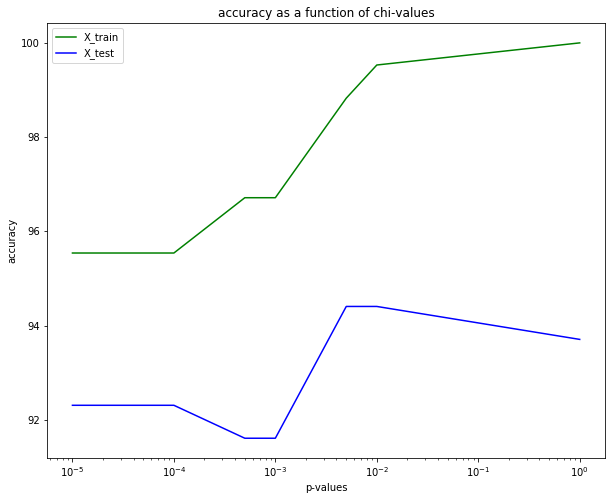

In [75]:
chi_values = [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]
plt.plot(chi_values, training, 'g')
plt.plot(chi_values, testing,'b')
plt.xscale('log')
plt.xlabel('p-values')
plt.ylabel('accuracy')
plt.title('accuracy as a function of chi-values')
plt.legend(['X_train', 'X_test'])
plt.show()

The results matching what we studied in class.
The graph on the train data is increasing according to the growing of the p value 
If p value is 1 we are getting accuracy of 100% because we need all the leafs to be pure and the number of nodes in the tree will be the highst.
The higher p value, we will get more nodes in the tree because the leafs are more pure.

When we look at thegraph of the testing data  we can see that the accuracy is increasing up some point until it gets to p value=0.01 when it reaches the highes point and then starts to decline. This fits our prediction because as we stated the higher p value is the more nodes we have in our tree, and as we learnd in class when all the leafs are pure we can bulid the tree with overfitting, means on the test data we woun't get the highest accuracy.

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain the results: what would happen to the training and testing accuracies when you remove nodes from the tree? Can you suggest a different approach to achieve better results? (20 points)

In [81]:
root = build_tree(X_train, calc_entropy)

In [82]:
print(number_of_internal_nodes(root))

15


In [83]:
internal_nodes, train_accuracy, test_accuracy = post_pruning(root, X_train, X_test)
#test_intenal_nodes, test_accuracy = post_pruning(test_root, X_test)

print("internal_nodes = " )
print(internal_nodes)
print("train_accuracy = ")
print(train_accuracy)
print("test_accuracy = ")
print(test_accuracy)

internal_nodes = 
[15, 14, 12, 11, 8, 7, 6, 4, 2, 1, 1]
train_accuracy = 
[100.0, 99.76525821596243, 99.53051643192488, 99.53051643192488, 98.59154929577466, 98.35680751173709, 98.12206572769952, 96.47887323943662, 94.83568075117371, 92.72300469483568, 60.56338028169014]
test_accuracy = 
[93.7062937062937, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 93.7062937062937, 93.00699300699301, 89.5104895104895, 69.23076923076923]


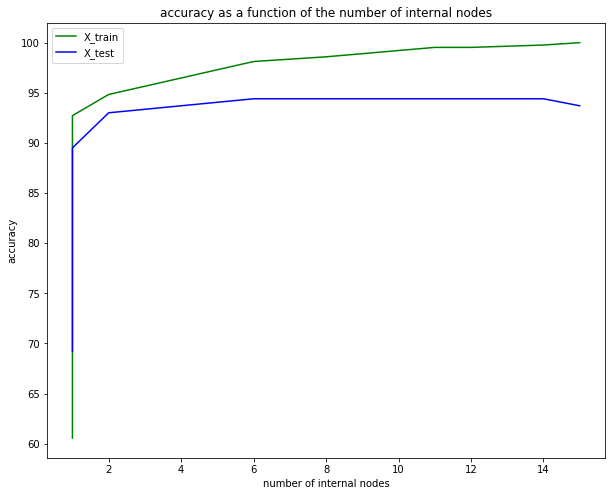

In [84]:
plt.plot(internal_nodes, train_accuracy, 'g')
plt.plot(internal_nodes, test_accuracy,'b')
plt.xlabel('number of internal nodes')
plt.ylabel('accuracy')
plt.title('accuracy as a function of the number of internal nodes')
plt.legend(['X_train', 'X_test'])
plt.show()

Training set curve -we can see that the accuracy begins at a maximum point - 100 %, since we begin the process from the leaves, in which purity is obtained.
As we progress through the process, we will rise in the tree and so will the pure ones.

Testing set curve- we can see that the accuracy begins at increasing progress and at some point starts decreasing. The reason for the that behavior is the fact that the tree was built according to the given set, so at some point over-fitting was accrued and so the accuracy was reduced. Therefore, at the starting point, at the leaves of the tree, we get a low purity which will rise as we progress in the tree to any maximum point where it begins to decrease, we go back to knowing nothing about our data.

To sum up, we would like to achieve better results by checking the accuracy during growing the tree, in other words to run pre-pruning algorithm.

## Print the tree

Complete the function `print_tree` in the python file `hw2.py` and print the tree using the chosen impurity measure and no pruning. Your code should like something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```


In [85]:
root = build_tree(X_train, calc_entropy)
print_tree(root)

[X27 <= 0.14235],
  [X3 <= 696.25],
    [X27 <= 0.1349],
      [X10 <= 0.62555],
        [X21 <= 33.349999999999994],
          leaf: [{1: 216}]
          [X21 <= 33.56],
            leaf: [{0: 1}]
            leaf: [{1: 17}]
        [X1 <= 18.630000000000003],
          leaf: [{0: 1}]
          leaf: [{1: 2}]
      [X15 <= 0.02744],
        [X0 <= 13.225000000000001],
          leaf: [{1: 1}]
          leaf: [{0: 4}]
        leaf: [{1: 6}]
    [X1 <= 19.72],
      [X6 <= 0.073105],
        leaf: [{1: 7}]
        leaf: [{0: 3}]
      leaf: [{0: 13}]
  [X13 <= 21.924999999999997],
    [X21 <= 29.0],
      [X1 <= 20.52],
        leaf: [{1: 8}]
        leaf: [{0: 1}]
      leaf: [{0: 5}]
    [X4 <= 0.079285],
      leaf: [{1: 1}]
      leaf: [{0: 140}]
